In [60]:
import tensorflow as tf
import keras
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.datasets import mnist
import pandas as pd

In [62]:
(Train,Train_label),(Test,Test_label) = mnist.load_data()

In [63]:
Train = Train.reshape(len(Train),28,28,1)
Test = Test.reshape(len(Test),28,28,1)
origin_Train = Train_label
origin_Test = Test_label
Train_label = np_utils.to_categorical(Train_label,10)
Test_label = np_utils.to_categorical(Test_label,10)

In [82]:
Train = Train/255
Test = Test/255

In [71]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

## 分為淺層及深層的CNN,以及有沒有全連接神經層

## 1.淺層CNN

In [48]:
model_shallow = Sequential()
model_shallow.add(Conv2D(filters=12,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))
model_shallow.add(MaxPooling2D(pool_size=(2,2)))
model_shallow.add(Dropout(0.5))
model_shallow.add(Conv2D(filters=20,kernel_size=(5,5),padding='same',activation='relu'))
model_shallow.add(MaxPooling2D(pool_size=(2,2)))
model_shallow.add(Dropout(0.5))
####################################加入FCN
model_shallow.add(Flatten())
model_shallow.add(Dense(units=64,activation='relu'))
model_shallow.add(Dropout(0.5))
model_shallow.add(Dense(units=128,activation='relu'))
model_shallow.add(Dropout(0.5))
#################################### Output layer
model_shallow.add(Dense(units=10,activation='softmax'))
model_shallow.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_shallow.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 12)        312       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 12)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 20)        6020      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 20)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 20)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 980)               0         
__________

In [49]:
train_shallow=model_shallow.fit(x=Train, y=Train_label, validation_data=(Test, Test_label), validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.9884 - acc: 0.6629 - val_loss: 0.1597 - val_acc: 0.9573
Epoch 2/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.3791 - acc: 0.8899 - val_loss: 0.0999 - val_acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2826 - acc: 0.9172 - val_loss: 0.0709 - val_acc: 0.9783
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2393 - acc: 0.9313 - val_loss: 0.0661 - val_acc: 0.9814
Epoch 5/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2159 - acc: 0.9393 - val_loss: 0.0562 - val_acc: 0.9835
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2041 - acc: 0.9425 - val_loss: 0.0538 - val_acc: 0.9839
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1841 - acc: 0.9484 - val_loss: 0.0468 -

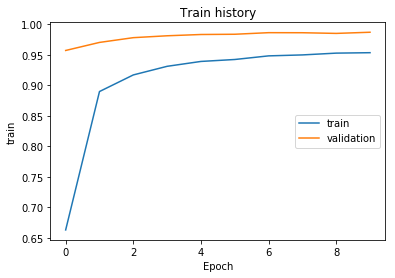

In [53]:
show_train_history(train_shallow,'acc','val_acc')

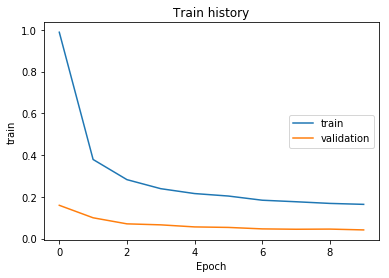

In [54]:
show_train_history(train_shallow,'loss','val_loss')

In [58]:
prediction_shallow_test = model_shallow.predict_classes(Test)
prediction_shallow_train = model_shallow.predict_classes(Train)

In [57]:
scores_shallow_test = model_shallow.evaluate(Test,Test_label)
print(scores_shallow_test[1])
scores_shallow_train = model_shallow.evaluate(Train,Train_label)
print(scores_shallow_train[1])

10000/10000 [==============================] - 1s 103us/step
0.9872
60000/60000 [==============================] - 6s 99us/step
0.9873333333333333


In [64]:
df_confusion_train = pd.crosstab(origin_Train,prediction_shallow_train,rownames=['label'],colnames=['predict'])
print(df_confusion_train)
df_confusion_train = pd.crosstab(origin_Test,prediction_shallow_test,rownames=['label'],colnames=['predict'])
print(df_confusion_train)

predict     0     1     2     3     4     5     6     7     8     9
label                                                              
0        5888     1     1     2     1     0    21     0     7     2
1           0  6681    34     2     3     0     2    11     9     0
2           5     5  5892    17     4     0     1    16    14     4
3           2     0    22  6041     0    22     0    21    13    10
4           2     8     5     0  5757     0    13     4     4    49
5           6     0     1    20     0  5342    26     0    18     8
6           7     5     1     1     4    10  5876     0    14     0
7           1     9    21     8     6     1     0  6203     2    14
8          10    18    14     8     5    20    13     7  5732    24
9          12     5     2     8    22    18     1    35    18  5828
predict    0     1     2    3    4    5    6     7    8    9
label                                                       
0        974     0     0    0    0    0    3     1    2    0
1

## 深層CNN

In [83]:
model_deep = Sequential()
model_deep.add(Conv2D(filters=12,kernel_size=(7,7),padding='same',input_shape=(28,28,1),activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(7,7),padding='same',activation='relu'))
model_deep.add(MaxPooling2D(pool_size=(2,2)))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(5,5),padding='same',activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(5,5),padding='same',activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(3,3),padding='same',activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(3,3),padding='same',activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(3,3),padding='same',activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(3,3),padding='same',activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(3,3),padding='same',activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Conv2D(filters=20,kernel_size=(3,3),padding='same',activation='relu'))
model_deep.add(Dropout(0.5))
####################################加入FCN
model_deep.add(Flatten())
model_deep.add(Dense(units=64,activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Dense(units=128,activation='relu'))
model_deep.add(Dropout(0.5))
#################################### Output layer
model_deep.add(Dense(units=10,activation='softmax'))
model_deep.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 28, 28, 12)        600       
_________________________________________________________________
dropout_132 (Dropout)        (None, 28, 28, 12)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 28, 28, 20)        11780     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
dropout_133 (Dropout)        (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 14, 14, 20)        10020     
_________________________________________________________________
dropout_134 (Dropout)        (None, 14, 14, 20)        0         
__________

In [84]:
train_deep=model_deep.fit(x=Train, y=Train_label, validation_data=(Test, Test_label), validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 394us/step - loss: 1.4077 - acc: 0.5053 - val_loss: 3.1484 - val_acc: 0.2642 ET
Epoch 2/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.4834 - acc: 0.8620 - val_loss: 1.6358 - val_acc: 0.5598
Epoch 3/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.3451 - acc: 0.9051 - val_loss: 0.6427 - val_acc: 0.7993
Epoch 4/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.2874 - acc: 0.9205 - val_loss: 0.6312 - val_acc: 0.8157A: 8s - loss: 0.2999 - acc: 0.91 - ETA: 8s - loss: 0.299
Epoch 5/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.2542 - acc: 0.9313 - val_loss: 1.0751 - val_acc: 0.6593loss: 0.2546 - acc:  - ETA: 2s - loss: 0.2551 - acc: 0.931 - ETA: 2s - loss: 0.2552 - acc: 0. - ETA: 2s - loss: 0.2556 - acc - ETA: 1s - loss: 0.
Epoch 6/10
60000/60000 [===========================

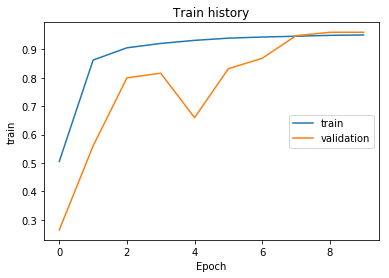

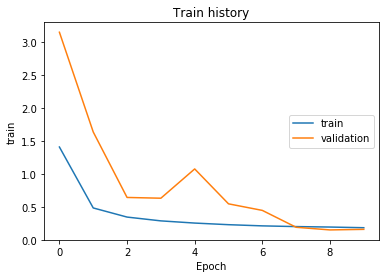

In [85]:
show_train_history(train_deep,'acc','val_acc')
show_train_history(train_deep,'loss','val_loss')

In [86]:
prediction_deep_test = model_deep.predict_classes(Test)
prediction_deep_train = model_deep.predict_classes(Train)
scores_deep_test = model_deep.evaluate(Test,Test_label)
print(scores_deep_test[1])
scores_deep_train = model_deep.evaluate(Train,Train_label)
print(scores_deep_train[1])

10000/10000 [==============================] - 2s 222us/step
0.9599
60000/60000 [==============================] - 12s 207us/step
0.9565


In [87]:
df_confusion_train = pd.crosstab(origin_Train,prediction_deep_train,rownames=['label'],colnames=['predict'])
print(df_confusion_train)
df_confusion_train = pd.crosstab(origin_Test,prediction_deep_test,rownames=['label'],colnames=['predict'])
print(df_confusion_train)

predict     0     1     2     3     4     5     6     7     8     9
label                                                              
0        5869    41     0     0     1     0     9     0     0     3
1           0  6735     5     0     2     0     0     0     0     0
2          57   340  5340     5    87     0     4    83    36     6
3           8    70    62  5786     6    26     1    81    59    32
4           0    53     0     0  5758     0     2     1     0    28
5          18    26     1     6    43  5006    97     5    89   130
6          61    76     0     0    40     0  5734     0     7     0
7           2   217     5     1     8     0     0  6011     1    20
8          27   267     2     0    31     2    32     8  5431    51
9          10    41     0     0   132     0     0    32    14  5720
predict    0     1    2    3    4    5    6    7    8    9
label                                                     
0        976     2    0    0    0    0    2    0    0    0
1      

## 沒有FCN

In [90]:
model_CNN = Sequential()
model_CNN.add(Conv2D(filters=12,kernel_size=(7,7),padding='same',input_shape=(28,28,1),activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Conv2D(filters=20,kernel_size=(7,7),padding='same',activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.5))
model_CNN.add(Flatten())
#################################### Output layer
model_CNN.add(Dense(units=10,activation='softmax'))
model_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 28, 28, 12)        600       
_________________________________________________________________
dropout_146 (Dropout)        (None, 28, 28, 12)        0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 28, 28, 20)        11780     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
dropout_147 (Dropout)        (None, 14, 14, 20)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3920)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                39210     
Total para

In [91]:
train_CNN=model_CNN.fit(x=Train, y=Train_label, validation_data=(Test, Test_label), validation_split=0.2, epochs=15, batch_size=128, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 215us/step - loss: 0.3208 - acc: 0.9034 - val_loss: 0.0860 - val_acc: 0.9780
Epoch 2/15
60000/60000 [==============================] - 12s 197us/step - loss: 0.1057 - acc: 0.9679 - val_loss: 0.0526 - val_acc: 0.9831
Epoch 3/15
60000/60000 [==============================] - 12s 202us/step - loss: 0.0814 - acc: 0.9750 - val_loss: 0.0385 - val_acc: 0.9875
Epoch 4/15
60000/60000 [==============================] - 12s 197us/step - loss: 0.0668 - acc: 0.9798 - val_loss: 0.0359 - val_acc: 0.9896
Epoch 5/15
60000/60000 [==============================] - 12s 197us/step - loss: 0.0586 - acc: 0.9813 - val_loss: 0.0328 - val_acc: 0.9895
Epoch 6/15
60000/60000 [==============================] - 12s 197us/step - loss: 0.0538 - acc: 0.9832 - val_loss: 0.0298 - val_acc: 0.9894
Epoch 7/15
60000/60000 [==============================] - 12s 194us/step - loss: 0.0512 - acc: 0.9837 - val_loss: 0.

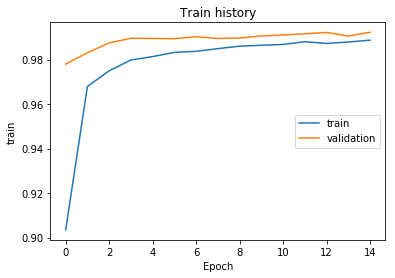

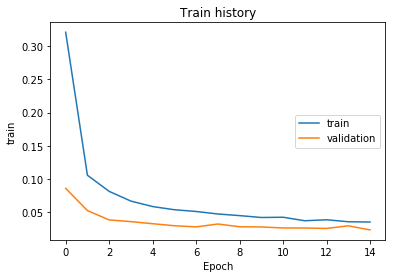

In [92]:
show_train_history(train_CNN,'acc','val_acc')
show_train_history(train_CNN,'loss','val_loss')

In [93]:
prediction_CNN_test = model_CNN.predict_classes(Test)
prediction_CNN_train = model_CNN.predict_classes(Train)
scores_CNN_test = model_CNN.evaluate(Test,Test_label)
print(scores_CNN_test[1])
scores_CNN_train = model_CNN.evaluate(Train,Train_label)
print(scores_CNN_train[1])

10000/10000 [==============================] - 2s 174us/step
0.9923
60000/60000 [==============================] - 9s 157us/step
0.99535


In [94]:
df_confusion_train = pd.crosstab(origin_Train,prediction_CNN_train,rownames=['label'],colnames=['predict'])
print(df_confusion_train)
df_confusion_train = pd.crosstab(origin_Test,prediction_CNN_test,rownames=['label'],colnames=['predict'])
print(df_confusion_train)

predict     0     1     2     3     4     5     6     7     8     9
label                                                              
0        5905     0     1     0     0     0    13     0     1     3
1           0  6731     2     0     1     0     3     5     0     0
2           0     3  5943     1     1     0     2     5     0     3
3           0     0    10  6103     0     4     0     2     4     8
4           0     3     0     0  5822     0     3     1     0    13
5           1     0     0     7     1  5379    20     0    10     3
6           3     0     0     0     1     0  5914     0     0     0
7           0     8     8     2     6     0     0  6222     1    18
8           5    12     8     4     6     0     9     1  5781    25
9           2     1     0     1     9     3     2     7     3  5921
predict    0     1     2     3    4    5    6     7    8     9
label                                                         
0        976     0     0     0    0    0    2     0    1  

## 多層FCN

In [96]:
model_FCN = Sequential()
model_FCN.add(Conv2D(filters=12,kernel_size=(7,7),padding='same',input_shape=(28,28,1),activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Conv2D(filters=20,kernel_size=(7,7),padding='same',activation='relu'))
model_FCN.add(MaxPooling2D(pool_size=(2,2)))
model_FCN.add(Dropout(0.5))
model_FCN.add(Flatten())
####################################加入FCN
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
model_FCN.add(Dense(units=200,activation='relu'))
model_FCN.add(Dropout(0.5))
#################################### Output layer
model_FCN.add(Dense(units=10,activation='softmax'))
model_FCN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_FCN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_142 (Conv2D)          (None, 28, 28, 12)        600       
_________________________________________________________________
dropout_160 (Dropout)        (None, 28, 28, 12)        0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 28, 28, 20)        11780     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
dropout_161 (Dropout)        (None, 14, 14, 20)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 3920)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 200)               784200    
__________

In [97]:
train_FCN=model_FCN.fit(x=Train, y=Train_label, validation_data=(Test, Test_label), validation_split=0.2, epochs=15, batch_size=128, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 268us/step - loss: 1.8544 - acc: 0.2630 - val_loss: 2.0111 - val_acc: 0.2199
Epoch 2/15
60000/60000 [==============================] - 15s 244us/step - loss: 1.2691 - acc: 0.4322 - val_loss: 1.7457 - val_acc: 0.2227
Epoch 3/15
60000/60000 [==============================] - 15s 245us/step - loss: 1.1419 - acc: 0.4721 - val_loss: 2.4118 - val_acc: 0.2598
Epoch 4/15
60000/60000 [==============================] - 15s 246us/step - loss: 1.0676 - acc: 0.4976 - val_loss: 1.3578 - val_acc: 0.3684acc: 0
Epoch 5/15
60000/60000 [==============================] - 15s 246us/step - loss: 0.9876 - acc: 0.5422 - val_loss: 0.9419 - val_acc: 0.5236s - loss: 0.9898 - acc: 0
Epoch 6/15
60000/60000 [==============================] - 15s 249us/step - loss: 0.8295 - acc: 0.6617 - val_loss: 0.7788 - val_acc: 0.7131
Epoch 7/15
60000/60000 [==============================] - 14s 239us/step - loss: 0.71

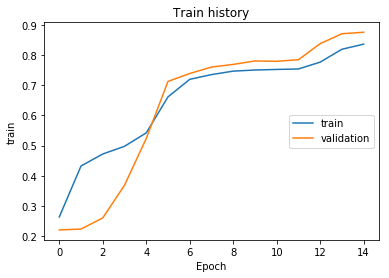

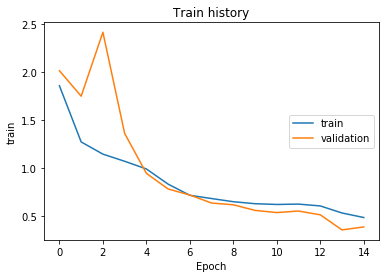

In [98]:
show_train_history(train_FCN,'acc','val_acc')
show_train_history(train_FCN,'loss','val_loss')

In [99]:
prediction_FCN_test = model_FCN.predict_classes(Test)
prediction_FCN_train = model_FCN.predict_classes(Train)
scores_FCN_test = model_FCN.evaluate(Test,Test_label)
print(scores_FCN_test[1])
scores_FCN_train = model_FCN.evaluate(Train,Train_label)
print(scores_FCN_train[1])

10000/10000 [==============================] - 2s 166us/step
0.8764
60000/60000 [==============================] - 10s 174us/step
0.8745166666666667


In [100]:
df_confusion_train = pd.crosstab(origin_Train,prediction_FCN_train,rownames=['label'],colnames=['predict'])
print(df_confusion_train)
df_confusion_train = pd.crosstab(origin_Test,prediction_FCN_test,rownames=['label'],colnames=['predict'])
print(df_confusion_train)

predict     0     1     2     3    4     5     6     7     8     9
label                                                             
0        5727     2     1     0    1     0   191     0     1     0
1           0  6668     8     5   13     0    10     3    16    19
2           0    48  5702    92    3     0    20    31    32    30
3           0    40    13  5776    0     4     6     9   265    18
4           0  5613     0     0  151     0    39     1     3    35
5           1    22     1     8    2  5142    27     0   216     2
6           2    76     0     0    0     0  5813     0    27     0
7           1    18     3     5    4     0     0  6049     9   176
8           1    82     4     0    9     2    23     1  5717    12
9           4    35     0     0  105     2    18    19    40  5726
predict    0     1    2    3   4    5    6    7    8    9
label                                                    
0        953     0    0    0   0    0   26    1    0    0
1          0  1124    